Beta is defined as:

βi = (σi, M))/σ²M

β = 1: Asset moves in the same direction and in the same amount as the benchmark 

0 > β > 1: Asset moves i t the same direction, but in a lesser amount than the benchmark

In [1]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf

In [2]:
yf.pdr_override()

In [3]:
end  = dt.datetime.now()
start = dt.date(end.year - 5, end.month,end.day)
Input = ['MSFT', '^GSPC']#MSFT: Microsoft ka symbol, #^GSPC: S&P 500 ka symol

In [4]:
df = reader.get_data_yahoo(Input,start,end)['Adj Close']
df

[*********************100%***********************]  2 of 2 completed


,MSFT,^GSPC
Date,,
2018-06-11,95.572884,2782.000000
2018-06-12,95.818779,2786.850098
2018-06-13,95.383705,2775.629883
2018-06-14,95.922821,2782.489990
2018-06-15,94.702721,2779.659912
...,...,...
2023-06-05,335.940002,4273.790039
2023-06-06,333.679993,4283.850098
2023-06-07,323.380005,4267.520020


In [5]:
# As we are intrested in monthly returns let's calculate them
monthly_returns = df.resample('M').ffill().pct_change()
monthly_returns

,MSFT,^GSPC
Date,,
2018-06-30,NaN,NaN
2018-07-31,0.075753,0.036022
2018-08-31,0.062993,0.030263
2018-09-30,0.018161,0.004294
2018-10-31,-0.066101,-0.069403
...,...,...
2023-02-28,0.009018,-0.026112
2023-03-31,0.155882,0.035052
2023-04-30,0.065765,0.014642


In [6]:
# Upar jo NaN values thi usko udane ke liye vo row hi drop kr dete hai
monthly_returns = monthly_returns.dropna(axis=0)
monthly_returns.head()

,MSFT,^GSPC
Date,,
2018-07-31,0.075753,0.036022
2018-08-31,0.062993,0.030263
2018-09-30,0.018161,0.004294
2018-10-31,-0.066101,-0.069403
2018-11-30,0.042684,0.017859


# Building the Regression Model:

General Linear Regression : Yi = β0 + βiXi + εi

In CAPM Terms: ri,t = α + β * rM,t + εt

In [7]:
# Define the Depenedent and Indepenedent variable

X = monthly_returns['^GSPC']
y = monthly_returns['MSFT'] 

# When using the stats models api we always have to add a constant 
# Referring to the documentation of the stats model, an intercept is not included by default, it should be added by the user

X_stats_model = sm.add_constant(X)

In [8]:
model = sm.OLS(y, X_stats_model) #OLS  = Ordinary Least Squares

In [9]:
results = model.fit()

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     86.59
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           4.17e-13
Time:                        22:09:56   Log-Likelihood:                 107.58
No. Observations:                  60   AIC:                            -211.2
Df Residuals:                      58   BIC:                            -207.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0147      0.005      2.741      0.008       0.004       0.025
^GSPC          0.9224      0.099      9.306      0.000       0.724       1.121
==============================================================================
Omnibus:                        3.198   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.618
Skew:                           0.509   Prob(JB):                        0.270
Kurtosis:                       3.100   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Yahoo finance par aapne dekha hoga ki β(market return Coefficient) ki value 0.93 thi
# aur ye value same hai summary mey ^GSPC ki coefficient value se and 
# α(which is our intercept) ki value hai 0.02 and ye const ki coefficient value mey dikhega

In [12]:
# Lets Visualize our results

In [13]:
import seaborn as sns

<Axes: xlabel='^GSPC', ylabel='MSFT'>

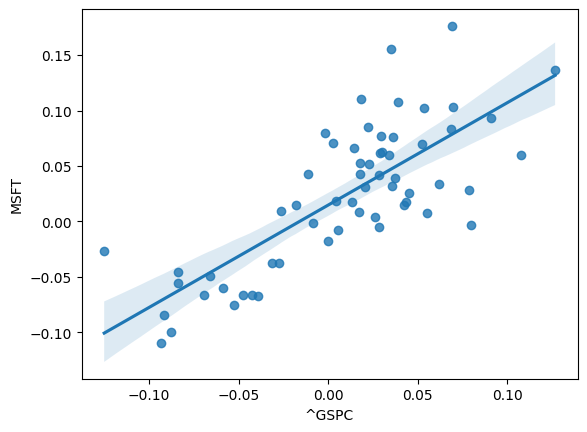

In [14]:
sns.regplot(x='^GSPC',y='MSFT',data=monthly_returns)
# ye jo niche shaded region hai ye 95% confidence interval hai
# agar nahi chahiye shaded region to ci=none kar dena data ke baad comma daal kar 

In [15]:
# But we forgot the risk free rate

# Equation with risk-free rate is attached in the file

In [16]:
rf = reader.DataReader('F-F_Research_Data_Factors','famafrench',start,end)[0].RF
rf = rf[1:]

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- F-F_RESEARCH_DATA_FACTORS: No timezone found, symbol may be delisted


KeyError: 0